# Machine Learning Engineer

Capstone Project

Project: Bitcoin Price Predictor

# Step 1: Data Set 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.cross_validation import ShuffleSplit
from datetime import datetime

# Load the Boston housing dataset
bitcoin = pd.read_csv('BTC-USD.csv')

print ("The Dataset has been loaded")

/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The Dataset has been loaded


# Step 2: Preprocess The Data and Normalize it 

In [2]:
print (bitcoin.head())
print ("-----------------------------------------------------------------------")
print (bitcoin.tail())
print ("\n")
print ("This will tells me how the dataset looks from the top send and how it looks from the bottom end ")

         Date         Open         High          Low        Close  \
0  2017-01-01   963.380005  1001.609985   956.099976   995.440002   
1  2017-01-02   995.440002  1031.680054   990.200012  1017.049988   
2  2017-01-03  1017.049988  1035.469971  1006.530029  1033.300049   
3  2017-01-04  1033.300049  1148.540039  1022.320007  1135.410034   
4  2017-01-05  1135.410034  1150.630005   874.530029   989.349976   

     Adj Close     Volume  
0   995.440002   40570922  
1  1017.049988   66038073  
2  1033.300049   56085870  
3  1135.410034  170584623  
4   989.349976  244839289  
-----------------------------------------------------------------------
           Date          Open          High           Low         Close  \
360  2017-12-27  15757.019531  16514.589844  14534.660156  15416.639648   
361  2017-12-28  15416.339844  15505.509766  13466.070313  14398.700195   
362  2017-12-29  14398.450195  15109.809570  13951.080078  14392.570313   
363  2017-12-30  14392.139648  14461.459961  

In [29]:
print (bitcoin.dtypes.index)
print ("\n")
print ("This will tell me what columns are used for the dataset")

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Adj Close', u'Volume'], dtype='object')


This will tell me what columns are used for the dataset


In [30]:
#Stats When Market is Open 
print ("The Statistic of When the Market is Open \n")

print "The minimum price of when the market was open was: $",np.min(bitcoin['Open'])
print "The maximum price of when the market was open was: $",np.max(bitcoin['Open'])
print "The mean of when the market was open was: ",np.mean(bitcoin['Open'])
print "The standard deviation of when the market was open was: ",np.std(bitcoin['Open'])

The Statistic of When the Market is Open 

The minimum price of when the market was open was: $ 785.429993
The maximum price of when the market was open was: $ 19346.599609
The mean of when the market was open was:  3945.74981474
The standard deviation of when the market was open was:  3951.07964561


In [31]:
#Stats When Market is Closed
print "The Statistic of When the Market is Closed \n"

print "The minimum price of when the market was closed was: $",np.min(bitcoin['Close'])
print "The maximum price of when the market was closed was: $",np.max(bitcoin['Close'])
print "The mean of when the market was closed was: ",np.mean(bitcoin['Close'])
print "The standard deviation of when the market was closed was: ",np.std(bitcoin['Close'])

The Statistic of When the Market is Closed 

The minimum price of when the market was closed was: $ 785.429993
The maximum price of when the market was closed was: $ 19345.490234
The mean of when the market was closed was:  3981.07152553
The standard deviation of when the market was closed was:  3981.70966239


In [32]:
#Stats When Market is at its Highest
print "The Statistic of When the Market was at its Highest  \n"

print "The minimum price of when the market was at its highest: $",np.min(bitcoin['High'])
print "The maximum price of when the market was at its highest: $",np.max(bitcoin['High'])
print "The mean of when the market was at its highest: ",np.mean(bitcoin['High'])
print "The standard deviation of when the market was at its highest: ",np.std(bitcoin['High'])

The Statistic of When the Market was at its Highest  

The minimum price of when the market was at its highest: $ 826.429993
The maximum price of when the market was at its highest: $ 19870.619141
The mean of when the market was at its highest:  4124.41227024
The standard deviation of when the market was at its highest:  4180.16477853


In [7]:
#Stats When Market is at Lowest
print "The Statistic of When the Market was at its Lowest  \n"

print "The minimum price of when the market was at its lowest: $",np.min(bitcoin['Low'])
print "The maximum price of when the market was at its lowest: $",np.max(bitcoin['Low'])
print "The mean of when the market was at its lowest: ",np.mean(bitcoin['Low'])
print "The standard deviation of when the market was at its lowest: ",np.std(bitcoin['Low'])

The Statistic of When the Market was at its Lowest  

The minimum price of when the market was at its lowest: $ 739.549988
The maximum price of when the market was at its lowest: $ 18750.910156
The mean of when the market was at its lowest:  3765.69586917
The standard deviation of when the market was at its lowest:  3681.58390551


In [8]:
#Stats When Market for the Adj Closed
print "The Statistic of When the Market for the Adjusted Closed   \n"

print "The minimum price of the Adjusted Closed : $",np.min(bitcoin['Adj Close'])
print "The maximum price of the Adjusted Closed : $",np.max(bitcoin['Adj Close'])
print "The mean of the Adjusted Closed: ",np.mean(bitcoin['Adj Close'])
print "The standard deviation of the Adjusted Closed : ",np.std(bitcoin['Adj Close'])

The Statistic of When the Market for the Adjusted Closed   

The minimum price of the Adjusted Closed : $ 785.429993
The maximum price of the Adjusted Closed : $ 19345.490234
The mean of the Adjusted Closed:  3981.07152553
The standard deviation of the Adjusted Closed :  3981.70966239


In [9]:
#Stats When Market for the Volume 
print "The Statistic of Volume  \n"

print "The minimum price of the Volume: ",np.min(bitcoin['Volume'])
print "The maximum price of the Volume: ",np.max(bitcoin['Volume'])
print "The mean of the Volume: ",np.mean(bitcoin['Volume'])
print "The standard deviation of the Volume:",np.std(bitcoin['Volume'])

The Statistic of Volume  

The minimum price of the Volume:  10214368
The maximum price of the Volume:  6245731508
The mean of the Volume:  502642902.567
The standard deviation of the Volume: 748665681.327


In [2]:
pd.to_datetime(bitcoin['Date'])

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
5     2017-01-06
6     2017-01-07
7     2017-01-08
8     2017-01-09
9     2017-01-10
10    2017-01-11
11    2017-01-12
12    2017-01-13
13    2017-01-14
14    2017-01-15
15    2017-01-16
16    2017-01-17
17    2017-01-18
18    2017-01-19
19    2017-01-20
20    2017-01-21
21    2017-01-22
22    2017-01-23
23    2017-01-24
24    2017-01-25
25    2017-01-26
26    2017-01-27
27    2017-01-28
28    2017-01-29
29    2017-01-30
         ...    
335   2017-12-02
336   2017-12-03
337   2017-12-04
338   2017-12-05
339   2017-12-06
340   2017-12-07
341   2017-12-08
342   2017-12-09
343   2017-12-10
344   2017-12-11
345   2017-12-12
346   2017-12-13
347   2017-12-14
348   2017-12-15
349   2017-12-16
350   2017-12-17
351   2017-12-18
352   2017-12-19
353   2017-12-20
354   2017-12-21
355   2017-12-22
356   2017-12-23
357   2017-12-24
358   2017-12-25
359   2017-12-26
360   2017-12-27
361   2017-12-28
362   2017-12-

In [11]:
print bitcoin

           Date          Open          High           Low         Close  \
0    2017-01-01    963.380005   1001.609985    956.099976    995.440002   
1    2017-01-02    995.440002   1031.680054    990.200012   1017.049988   
2    2017-01-03   1017.049988   1035.469971   1006.530029   1033.300049   
3    2017-01-04   1033.300049   1148.540039   1022.320007   1135.410034   
4    2017-01-05   1135.410034   1150.630005    874.530029    989.349976   
5    2017-01-06    989.349976   1027.420044    852.549988    886.159973   
6    2017-01-07    886.159973    900.859985    806.659973    888.869995   
7    2017-01-08    888.869995    936.130005    875.849976    900.859985   
8    2017-01-09    900.859985    910.469971    870.909973    899.780029   
9    2017-01-10    899.780029    911.320007    890.119995    904.369995   
10   2017-01-11    904.369995    917.650024    751.630005    785.429993   
11   2017-01-12    785.429993    828.210022    739.549988    810.109985   
12   2017-01-13    810.10

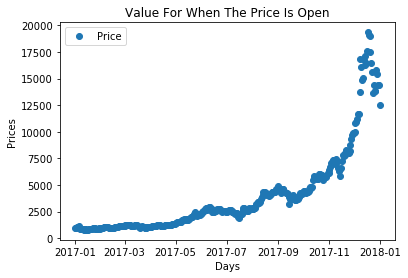

In [34]:
#plot the graph when Bitcoin market is Open 
import matplotlib.pyplot as plt 

plt.plot_date(bitcoin['Date'],bitcoin['Open'],label='Price')
plt.ylabel('Prices')
plt.xlabel('Days')
plt.title('Value For When The Price Is Open')
plt.legend()
plt.show()

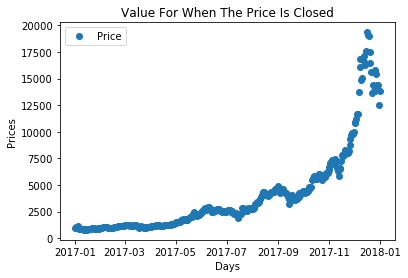

In [35]:
#plot the graph when Bitcoin market is closed
import matplotlib.pyplot as plt 

plt.plot_date(bitcoin['Date'],bitcoin['Close'],label='Price')
plt.ylabel('Prices')
plt.xlabel('Days')
plt.title('Value For When The Price Is Closed')
plt.legend()
plt.show()

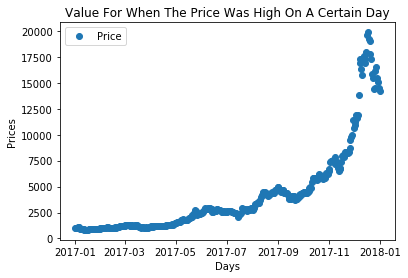

In [36]:
#plot the graph when Bitcoin market for when its High 
import matplotlib.pyplot as plt 

plt.plot_date(bitcoin['Date'],bitcoin['High'],label='Price')
plt.ylabel('Prices')
plt.xlabel('Days')
plt.title('Value For When The Price Was High On A Certain Day')
plt.legend()
plt.show()

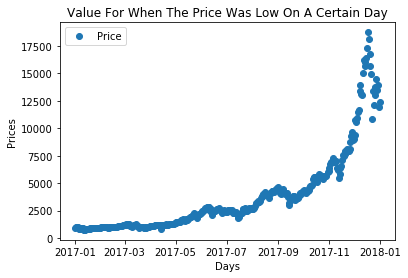

In [37]:
#plot the graph when Bitcoin market for when is at is low 
import matplotlib.pyplot as plt 

plt.plot_date(bitcoin['Date'],bitcoin['Low'],label='Price')
plt.ylabel('Prices')
plt.xlabel('Days')
plt.title('Value For When The Price Was Low On A Certain Day')
plt.legend()
plt.show()

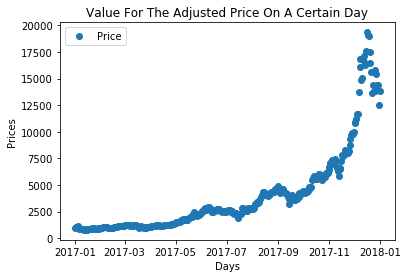

In [38]:
#plot the graph when Bitcoin market for that day Adjusted Closed
import matplotlib.pyplot as plt 

plt.plot_date(bitcoin['Date'],bitcoin['Adj Close'],label='Price')
plt.ylabel('Prices')
plt.xlabel('Days')
plt.title('Value For The Adjusted Price On A Certain Day')
plt.legend()
plt.show()

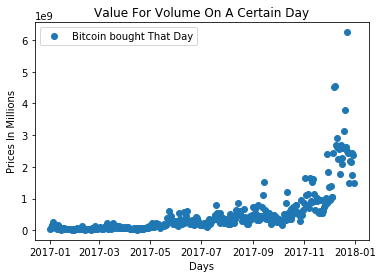

In [40]:
#plot the graph when Bitcoin market for when its volume for that day 
import matplotlib.pyplot as plt 

plt.plot_date(bitcoin['Date'],bitcoin['Volume'],label='Bitcoin bought That Day')
plt.ylabel('Prices In Millions')
plt.xlabel('Days')
plt.title('Value For Volume On A Certain Day')
plt.legend()
plt.show()

In [15]:
#scale the feature with MinMaxScaler so that when you scale it, its in the minimum and maximum
#value 

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
Bitcoin=bitcoin['Open']
print"I'm Normalizing the data when the market is Open \n"
print (scaler.fit(Bitcoin))
print (scaler.data_max_)
normalized_open=scaler.transform(bitcoin['Open'])
print normalized_open

I'm Normalizing the data when the market is Open 

MinMaxScaler(copy=True, feature_range=(0, 1))
19346.599609
[0.00958722 0.01131448 0.01247874 0.01335423 0.0188555  0.01098638
 0.00542692 0.00557292 0.0062189  0.00616071 0.006408   0.
 0.00132966 0.00212271 0.00184256 0.00192552 0.00225794 0.00615424
 0.00466566 0.0059145  0.00579058 0.00724146 0.00718759 0.00732874
 0.00583584 0.0058714  0.00701087 0.00714287 0.00716981 0.00695646
 0.00728941 0.0097009  0.01061356 0.01177404 0.01226162 0.0132761
 0.0124281  0.01288928 0.01423025 0.01454973 0.01042661 0.01143139
 0.0120084  0.01137267 0.01131017 0.01200948 0.0120014  0.01328042
 0.01422217 0.01437679 0.01419415 0.01573877 0.01797301 0.01805005
 0.02082197 0.02106872 0.01959036 0.02080418 0.02173354 0.02175725
 0.02355617 0.02532383 0.0268232  0.02580063 0.02617238 0.02648432
 0.02409654 0.0194783  0.02186823 0.01761527 0.0212158  0.02368816
 0.02439286 0.02465955 0.02521393 0.02087422 0.0154236  0.01001823
 0.01277775 0.0141198  0.018

/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


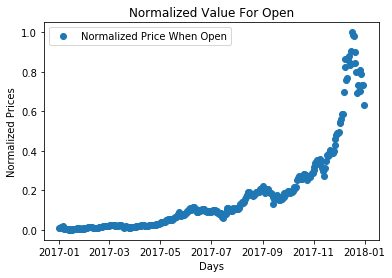

In [46]:
plt.plot_date(bitcoin['Date'],normalized_open,label='Normalized Price When Open')
plt.ylabel('Normalized Prices')
plt.xlabel('Days')
plt.title('Normalized Value For Open')
plt.legend()
plt.show()

In [16]:
print "The minimum value is: ",np.min(normalized_open)
print "The maximum value is: ",np.max(normalized_open)
print "The mean is: ",np.mean(normalized_open)
print "The standard deviation is: ",np.std(normalized_open)

The minimum value is:  0.0
The maximum value is:  1.0000000000000002
The mean is:  0.1702651226794579
The standard deviation is:  0.21286803188316708


In [17]:
#scale the feature with MinMaxScaler so that when you scale it, its in the minimum and maximum
#value 

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
Bitcoin_Close=bitcoin['Close']
print"I'm Normalizing the data when the market is Close \n"
print (scaler.fit(Bitcoin_Close))
print (scaler.data_max_)
normalized_close=scaler.transform(bitcoin['Close'])
print normalized_close

I'm Normalizing the data when the market is Close 

MinMaxScaler(copy=True, feature_range=(0, 1))
19345.490234
[0.01131516 0.01247949 0.01335502 0.01885662 0.01098703 0.00542724
 0.00557326 0.00621927 0.00616108 0.00640838 0.         0.00132974
 0.00212284 0.00184267 0.00192564 0.00225808 0.00615461 0.00466594
 0.00591485 0.00579093 0.0072419  0.00718802 0.00732918 0.00583619
 0.00587175 0.00701129 0.0071433  0.00717024 0.00695687 0.00728985
 0.00970148 0.01061419 0.01177475 0.01226235 0.0132769  0.01242884
 0.01289005 0.0142311  0.0145506  0.01042723 0.01143207 0.01200912
 0.01137335 0.01131085 0.0120102  0.01200212 0.01328121 0.01422302
 0.01437765 0.014195   0.01573972 0.01797408 0.01805113 0.02082321
 0.02106997 0.01959153 0.02080543 0.02173484 0.02175855 0.02355758
 0.02532535 0.02682481 0.02580218 0.02617394 0.02648591 0.02409798
 0.01947946 0.02186954 0.01761632 0.02121706 0.02368958 0.02439431
 0.02466102 0.02521544 0.02087547 0.01542452 0.01001883 0.01277851
 0.01412064 0.0180

/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


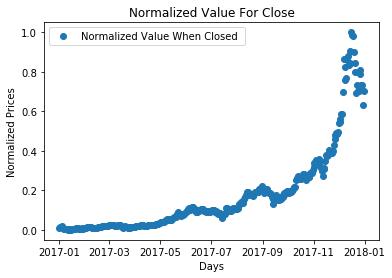

In [45]:
plt.plot_date(bitcoin['Date'],normalized_close,label='Normalized Value When Closed ')
plt.ylabel('Normalized Prices')
plt.xlabel('Days')
plt.title('Normalized Value For Close')
plt.legend()
plt.show()

In [19]:
print "The minimum value is: ",np.min(normalized_close)
print "The maximum value is: ",np.max(normalized_close)
print "The mean is: ",np.mean(normalized_close)
print "The standard deviation is: ",np.std(normalized_close)

The minimum value is:  0.0
The maximum value is:  1.0
The mean is:  0.17217840303499946
The standard deviation is:  0.21453107429000118


In [19]:
#scale the feature with MinMaxScaler so that when you scale it, its in the minimum and maximum
#value 

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
Bitcoin_Volume=bitcoin['Volume']
print"I'm Normalizing the data for the Volume \n"
print (scaler.fit(Bitcoin_Volume))
print (scaler.data_max_)
normalized_volume=scaler.transform(bitcoin['Volume'])
print (normalized_volume)

I'm Normalizing the data for the Volume 

MinMaxScaler(copy=True, feature_range=(0, 1))
6245731508.0
[4.86832981e-03 8.95253814e-03 7.35648720e-03 2.57188380e-02
 3.76271792e-02 2.70941922e-02 1.64899175e-02 9.63576407e-03
 7.33682740e-03 6.16303943e-03 2.40524944e-02 1.34347050e-02
 9.99780862e-03 4.23062168e-03 1.57009704e-03 2.78702321e-03
 9.95239971e-03 8.15137267e-03 6.74947162e-03 3.95039601e-03
 4.31637142e-03 5.43017207e-03 3.21491956e-03 6.93680124e-03
 3.81692448e-03 3.30065920e-03 2.93300068e-03 4.87124954e-04
 0.00000000e+00 1.18511486e-03 6.68025555e-03 5.42400049e-03
 6.48214753e-03 8.37406871e-03 4.84196793e-03 3.44086746e-03
 3.62664098e-03 4.98819589e-03 9.32111174e-03 2.17503931e-02
 8.08669784e-03 2.93321734e-03 7.39418222e-04 3.61969914e-03
 4.74631171e-03 2.14179204e-03 4.63480003e-03 6.03013209e-03
 2.66892908e-03 1.38922126e-03 3.64770900e-03 8.45065450e-03
 6.96543431e-03 1.04961301e-02 1.87255747e-02 6.86221544e-03
 4.09523211e-03 5.10318507e-03 8.04383981e-03

/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


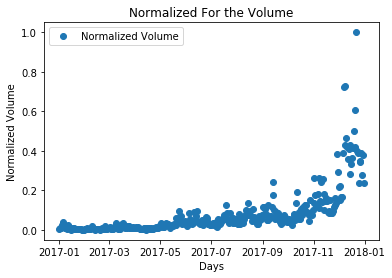

In [47]:
plt.plot_date(bitcoin['Date'],normalized_volume,label='Normalized Volume')
plt.title('Normalized For the Volume')
plt.ylabel('Normalized Volume')
plt.xlabel('Days')
plt.legend()
plt.show()

In [21]:
print "The minimum value is: ",np.min(normalized_volume)
print "The maximum value is: ",np.max(normalized_volume)
print "The mean is: ",np.mean(normalized_volume)
print "The standard deviation is: ",np.std(normalized_volume)

The minimum value is:  0.0
The maximum value is:  1.0
The mean is:  0.07897156298525117
The standard deviation is:  0.12006472992029554


In [21]:
#scale the feature with MinMaxScaler so that when you scale it, its in the minimum and maximum
#value 

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
Bitcoin_High=bitcoin['High']
print"I'm Normalizing the data for the High \n"
print (scaler.fit(Bitcoin_High))
print (scaler.data_max_)
normalized_High=scaler.transform(bitcoin['High'])
print (normalized_High)

I'm Normalizing the data for the High 

MinMaxScaler(copy=True, feature_range=(0, 1))
19870.619141
[9.19860597e-03 1.07775689e-02 1.09765754e-02 1.69138231e-02
 1.70235661e-02 1.05538781e-02 3.90827834e-03 5.76028788e-03
 4.41289347e-03 4.45752840e-03 4.78991415e-03 9.34683533e-05
 4.52631243e-04 6.54794536e-04 0.00000000e+00 5.37170678e-04
 4.19813159e-03 4.58092436e-03 4.14037245e-03 3.94135956e-03
 5.38221917e-03 5.87843416e-03 5.33233451e-03 5.20788736e-03
 4.16242552e-03 4.87760404e-03 5.04773421e-03 5.01255376e-03
 5.03933406e-03 5.03670607e-03 7.40488439e-03 8.40886492e-03
 9.59347813e-03 1.03595893e-02 1.12690566e-02 1.08815366e-02
 1.07208546e-02 1.19548268e-02 1.27492951e-02 1.29488336e-02
 9.40811822e-03 9.86600230e-03 9.52469084e-03 9.51366270e-03
 9.83869639e-03 9.68799451e-03 1.12291489e-02 1.21275850e-02
 1.24331872e-02 1.20797995e-02 1.34082913e-02 1.55743064e-02
 1.60584420e-02 1.86497824e-02 2.02324181e-02 1.85662941e-02
 1.84329181e-02 1.93964652e-02 2.00475838e-02 2

/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


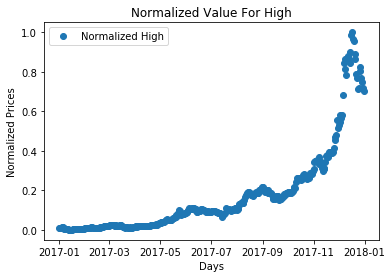

In [49]:
plt.plot_date(bitcoin['Date'],normalized_High,label='Normalized High' )
plt.ylabel('Normalized Prices')
plt.xlabel('Days')
plt.title('Normalized Value For High')
plt.legend()
plt.show()

In [23]:
print "The minimum value is: ",np.min(normalized_High)
print "The maximum value is: ",np.max(normalized_High)
print "The mean is: ",np.mean(normalized_High)
print "The standard deviation is: ",np.std(normalized_High)

The minimum value is:  0.0
The maximum value is:  1.0000000000000002
The mean is:  0.17317525317638352
The standard deviation is:  0.2194981758500852


In [25]:
#scale the feature with MinMaxScaler so that when you scale it, its in the minimum and maximum
#value 

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
Bitcoin_Low=bitcoin['Low']
print"I'm Normalizing the data for the Low \n"
print (scaler.fit(Bitcoin_Low))
print (scaler.data_max_)
normalized_Low=scaler.transform(bitcoin['Low'])
print (normalized_Low)

I'm Normalizing the data for the Low 

MinMaxScaler(copy=True, feature_range=(0, 1))
18750.910156
[1.20229669e-02 1.39162185e-02 1.48228695e-02 1.56995372e-02
 7.49416145e-03 6.27381824e-03 3.72598096e-03 7.56744559e-03
 7.29317407e-03 8.35972440e-03 6.70688770e-04 0.00000000e+00
 1.74612088e-03 3.81537160e-03 3.83535815e-03 4.33892961e-03
 4.74644831e-03 5.90294159e-03 7.28207269e-03 7.73678582e-03
 8.32308235e-03 8.27644362e-03 9.51066363e-03 8.30587111e-03
 7.99939681e-03 8.54682826e-03 9.34798890e-03 9.62115228e-03
 9.61226711e-03 9.54730905e-03 9.87321420e-03 1.22295050e-02
 1.29890252e-02 1.38612538e-02 1.44830808e-02 1.46851763e-02
 1.50616070e-02 1.55635113e-02 1.55890519e-02 1.02768494e-02
 1.15188431e-02 1.35681038e-02 1.40411397e-02 1.30778567e-02
 1.37085724e-02 1.44453273e-02 1.48706164e-02 1.58966344e-02
 1.69409785e-02 1.65517792e-02 1.67361043e-02 1.85432998e-02
 1.97253269e-02 2.07641204e-02 1.95909716e-02 2.09123558e-02
 2.17118526e-02 2.35806751e-02 2.42180495e-02 2.

/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


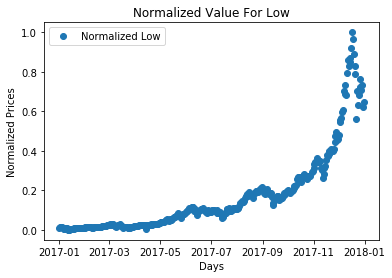

In [50]:
plt.plot_date(bitcoin['Date'],normalized_Low,label='Normalized Low')
plt.ylabel('Normalized Prices')
plt.xlabel('Days')
plt.title('Normalized Value For Low')
plt.legend()
plt.show()

In [25]:
print "The minimum value is: ",np.min(normalized_Low)
print "The maximum value is: ",np.max(normalized_Low)
print "The mean is: ",np.mean(normalized_Low)
print "The standard deviation is: ",np.std(normalized_Low)

The minimum value is:  0.0
The maximum value is:  0.9999999999999999
The mean is:  0.16801317906845387
The standard deviation is:  0.20440343600778235


In [27]:
#scale the feature with MinMaxScaler so that when you scale it, its in the minimum and maximum
#value 

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
Bitcoin_Adj_Close=bitcoin['Adj Close']
print"I'm Normalizing the data for the Adjusted Close \n"
print (scaler.fit(Bitcoin_Adj_Close))
print (scaler.data_max_)
normalized_Adj_Close=scaler.transform(bitcoin['Adj Close'])
print normalized_Adj_Close

I'm Normalizing the data for the Adjusted Close 

MinMaxScaler(copy=True, feature_range=(0, 1))
19345.490234
[0.01131516 0.01247949 0.01335502 0.01885662 0.01098703 0.00542724
 0.00557326 0.00621927 0.00616108 0.00640838 0.         0.00132974
 0.00212284 0.00184267 0.00192564 0.00225808 0.00615461 0.00466594
 0.00591485 0.00579093 0.0072419  0.00718802 0.00732918 0.00583619
 0.00587175 0.00701129 0.0071433  0.00717024 0.00695687 0.00728985
 0.00970148 0.01061419 0.01177475 0.01226235 0.0132769  0.01242884
 0.01289005 0.0142311  0.0145506  0.01042723 0.01143207 0.01200912
 0.01137335 0.01131085 0.0120102  0.01200212 0.01328121 0.01422302
 0.01437765 0.014195   0.01573972 0.01797408 0.01805113 0.02082321
 0.02106997 0.01959153 0.02080543 0.02173484 0.02175855 0.02355758
 0.02532535 0.02682481 0.02580218 0.02617394 0.02648591 0.02409798
 0.01947946 0.02186954 0.01761632 0.02121706 0.02368958 0.02439431
 0.02466102 0.02521544 0.02087547 0.01542452 0.01001883 0.01277851
 0.01412064 0.018095

/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


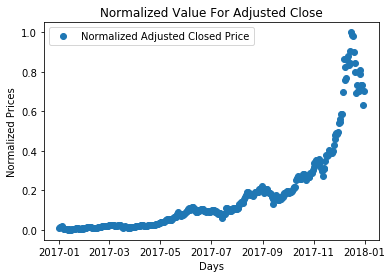

In [51]:
plt.plot_date(bitcoin['Date'],normalized_Adj_Close,label='Normalized Adjusted Closed Price')
plt.ylabel('Normalized Prices')
plt.xlabel('Days')
plt.title('Normalized Value For Adjusted Close')
plt.legend()
plt.show()

In [27]:
print "The minimum value is: ",np.min(normalized_Adj_Close)
print "The maximum value is: ",np.max(normalized_Adj_Close)
print "The mean is: ",np.mean(normalized_Adj_Close)
print "The standard deviation is: ",np.std(normalized_Adj_Close)

The minimum value is:  0.0
The maximum value is:  1.0
The mean is:  0.17217840303499946
The standard deviation is:  0.21453107429000118


# Step 2 

I Will start the benchmark model. I will be using Linear Regression 

In [2]:
#load the libaries
import datetime

from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import svm

from pandas import Series
from pandas import DataFrame
from pandas import concat

In [3]:
#See the data we are going to use 
print (bitcoin.tail())

           Date          Open          High           Low         Close  \
360  2017-12-27  15757.019531  16514.589844  14534.660156  15416.639648   
361  2017-12-28  15416.339844  15505.509766  13466.070313  14398.700195   
362  2017-12-29  14398.450195  15109.809570  13951.080078  14392.570313   
363  2017-12-30  14392.139648  14461.459961  11962.089844  12531.519531   
364  2017-12-31  12532.379883  14241.820313  12359.429688  13850.400391   

        Adj Close      Volume  
360  15416.639648  2162831128  
361  14398.700195  2425912717  
362  14392.570313  1733583750  
363  12531.519531  2387311023  
364  13850.400391  1492142483  


In [4]:
#only use the data for adjust Open
bitcoin=bitcoin[['Open']]

In [5]:
#Help predict the next 1 days 
Future=int(1)

In [6]:
#Column Label for the next 30 days 
bitcoin['Prediction']=bitcoin[['Open']].shift(-Future)

In [7]:
#print the new column
print (bitcoin.tail())

             Open    Prediction
360  15757.019531  15416.339844
361  15416.339844  14398.450195
362  14398.450195  14392.139648
363  14392.139648  12532.379883
364  12532.379883           NaN


In [8]:
#Drop the prediction column and scale input to normalize data 
X=np.array(bitcoin.drop(['Prediction'],1))
X=preprocessing.scale(X)

In [9]:
#Prediction Label will have no labels 
print (bitcoin.tail())

             Open    Prediction
360  15757.019531  15416.339844
361  15416.339844  14398.450195
362  14398.450195  14392.139648
363  14392.139648  12532.379883
364  12532.379883           NaN


In [10]:
#Set X_Future equal to last 1 days 
X_Future=X[-Future:]

In [11]:
#Remove the Last 1 Days from X 
X=X[:-Future]

In [12]:
#Define the Y value or the output value  and remove the last 30 days 
y=np.array(bitcoin['Prediction'])
y=y[:-Future]

In [45]:
#Do A Time Series Split
tscv = TimeSeriesSplit(n_splits=3)
print (tscv)

TimeSeriesSplit(n_splits=3)


In [48]:
#Start Linear Regression 
#Start with Train Test Split
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [49]:
print('Observations: %d' % (len(bitcoin)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 365
Training Observations: 356
Testing Observations: 7


In [27]:
#Create a linear regression 
reg=LinearRegression()

In [28]:
#Train the model using training set
reg.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#Testing 
accuracy=reg.score(X_test,y_test)

In [30]:
print ("Accuracy of the Linear Regression is : ",accuracy)

('Accuracy of the Linear Regression is : ', 0.7060152984976713)


In [31]:
#Predict the Future 
Future_Prediction=reg.predict(X_Future)

In [32]:
print ("Tomorrow Bitcoin Will Open up at :" ,Future_Prediction)

('Tomorrow Bitcoin Will Open up at :', array([12589.27584055]))


# Step 3

I will be using Neural Network Model now to evalute the model

In [2]:
import pandas
import matplotlib.pyplot as plt

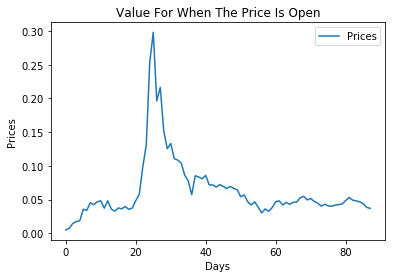

In [3]:
bitcoin = pandas.read_csv('BTC-USD.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(bitcoin,label='Prices')
plt.ylabel('Prices')
plt.xlabel('Days')
plt.title('Value For When The Price Is Open')
plt.legend()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Activation
from keras.layers.core import Dropout 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 

from subprocess import check_output

from numpy import newaxis

/Users/Adil/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Adil/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# fix random seed for reproducibility
np.random.seed(7)

In [6]:
Bitcoin = pandas.read_csv('BTC-USD.csv', usecols=[1], engine='python', skipfooter=3)
bitcoin = Bitcoin.values
bitcoin = bitcoin.astype('float32')

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
bitcoin = scaler.fit_transform(bitcoin)

In [8]:
train_size = int(len(bitcoin) * 0.80)
test_size = len(bitcoin) - train_size
train, test = bitcoin[0:train_size,:], bitcoin[train_size:len(bitcoin),:]
print(len(train), len(test))

(70, 18)


In [9]:
# convert an array of values into a dataset matrix
def create_bitcoin(bitcoin, look_back=1):
    dataX, dataY = [], []
    for i in range(len(bitcoin)-look_back-1):
        a = bitcoin[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(bitcoin[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
X_train, y_train = create_bitcoin(train, look_back)
X_test, y_test = create_bitcoin(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [12]:
#create and fit the LSTM Model 

#import model
model = Sequential()

#Input Layer
model.add(LSTM(32,input_dim=1,return_sequences=True))

#Hidden Layers
model.add(LSTM(16,return_sequences=False))

model.add(Dropout(0.2))

#Output layer 
model.add(Dense(1,activation='linear'))

#complier
model.compile(loss='mse', optimizer='rmsprop')

/Users/Adil/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/Users/Adil/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, return_sequences=True, input_shape=(None, 1))`
  import sys


In [235]:
#summary representation
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, None, 32)          4352      
_________________________________________________________________
lstm_36 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, y_train, batch_size=25, nb_epoch=250, validation_split=.15,verbose=1)

/Users/Adil/anaconda/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 57 samples, validate on 11 samples
Epoch 1/250
57/57 [==============================] - 3s 48ms/step - loss: 0.0901 - val_loss: 0.0147
Epoch 2/250
57/57 [==============================] - 0s 488us/step - loss: 0.0825 - val_loss: 0.0118
Epoch 3/250
57/57 [==============================] - 0s 524us/step - loss: 0.0768 - val_loss: 0.0098
Epoch 4/250
57/57 [==============================] - 0s 572us/step - loss: 0.0717 - val_loss: 0.0078
Epoch 5/250
57/57 [==============================] - 0s 616us/step - loss: 0.0675 - val_loss: 0.0064
Epoch 6/250
57/57 [==============================] - 0s 657us/step - loss: 0.0641 - val_loss: 0.0052
Epoch 7/250
57/57 [==============================] - 0s 638us/step - loss: 0.0603 - val_loss: 0.0040
Epoch 8/250
57/57 [==============================] - 0s 559us/step - loss: 0.0568 - val_loss: 0.0029
Epoch 9/250
57/57 [==============================] - 0s 584us/step - loss: 0.0542 - val_loss: 0.0020
Epoch 10/250
57/57 [============================

Epoch 81/250
57/57 [==============================] - 0s 571us/step - loss: 0.0097 - val_loss: 0.0012
Epoch 82/250
57/57 [==============================] - 0s 591us/step - loss: 0.0098 - val_loss: 0.0017
Epoch 83/250
57/57 [==============================] - 0s 520us/step - loss: 0.0133 - val_loss: 0.0011
Epoch 84/250
57/57 [==============================] - 0s 507us/step - loss: 0.0094 - val_loss: 9.1458e-04
Epoch 85/250
57/57 [==============================] - 0s 550us/step - loss: 0.0140 - val_loss: 0.0013
Epoch 86/250
57/57 [==============================] - 0s 530us/step - loss: 0.0081 - val_loss: 8.4690e-04
Epoch 87/250
57/57 [==============================] - 0s 537us/step - loss: 0.0086 - val_loss: 7.4495e-04
Epoch 88/250
57/57 [==============================] - 0s 659us/step - loss: 0.0091 - val_loss: 7.0837e-04
Epoch 89/250
57/57 [==============================] - 0s 698us/step - loss: 0.0094 - val_loss: 4.5116e-04
Epoch 90/250
57/57 [==============================] - 0s 602us

Epoch 158/250
57/57 [==============================] - 0s 497us/step - loss: 0.0087 - val_loss: 5.1123e-04
Epoch 159/250
57/57 [==============================] - 0s 554us/step - loss: 0.0100 - val_loss: 3.3524e-04
Epoch 160/250
57/57 [==============================] - 0s 527us/step - loss: 0.0077 - val_loss: 5.2747e-04
Epoch 161/250
57/57 [==============================] - 0s 650us/step - loss: 0.0076 - val_loss: 3.1958e-04
Epoch 162/250
57/57 [==============================] - 0s 637us/step - loss: 0.0100 - val_loss: 2.5934e-04
Epoch 163/250
57/57 [==============================] - 0s 537us/step - loss: 0.0148 - val_loss: 2.4290e-04
Epoch 164/250
57/57 [==============================] - 0s 612us/step - loss: 0.0155 - val_loss: 3.3375e-04
Epoch 165/250
57/57 [==============================] - 0s 578us/step - loss: 0.0098 - val_loss: 2.0756e-04
Epoch 166/250
57/57 [==============================] - 0s 828us/step - loss: 0.0088 - val_loss: 6.9732e-04
Epoch 167/250
57/57 [================

57/57 [==============================] - 0s 595us/step - loss: 0.0092 - val_loss: 5.5956e-04
Epoch 235/250
57/57 [==============================] - 0s 549us/step - loss: 0.0086 - val_loss: 4.0182e-04
Epoch 236/250
57/57 [==============================] - 0s 618us/step - loss: 0.0103 - val_loss: 4.8003e-04
Epoch 237/250
57/57 [==============================] - 0s 647us/step - loss: 0.0076 - val_loss: 3.9165e-04
Epoch 238/250
57/57 [==============================] - 0s 656us/step - loss: 0.0099 - val_loss: 2.4313e-04
Epoch 239/250
57/57 [==============================] - 0s 647us/step - loss: 0.0101 - val_loss: 4.0009e-04
Epoch 240/250
57/57 [==============================] - 0s 616us/step - loss: 0.0097 - val_loss: 4.2695e-04
Epoch 241/250
57/57 [==============================] - 0s 741us/step - loss: 0.0110 - val_loss: 1.9310e-04
Epoch 242/250
57/57 [==============================] - 0s 583us/step - loss: 0.0091 - val_loss: 2.6871e-04
Epoch 243/250
57/57 [==============================

In [20]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

futurePredict = model.predict(np.asarray([[testPredict[-1]]]))
futurePredict = scaler.inverse_transform(futurePredict)

In [15]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [239]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 127.15 RMSE


In [240]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 783.64 RMSE


In [16]:
#calculate R2 score
R2=r2_score(y_test[0],testPredict[:,0])
print ('R2 score: %.2f'% (R2))

R2 score: -0.96


In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(bitcoin)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [243]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(bitcoin)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(bitcoin)-1, :] = testPredict

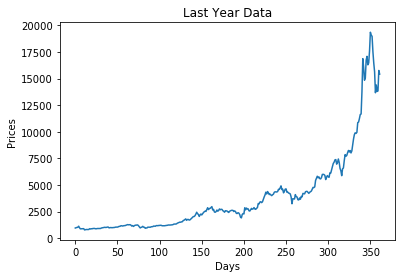

In [244]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(bitcoin))
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Last Year Data')
plt.show()

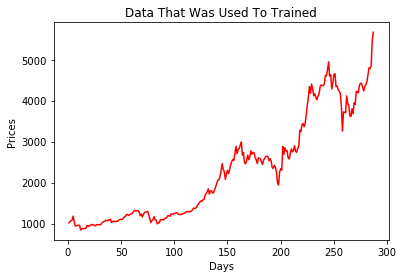

In [245]:
plt.plot(trainPredictPlot, color='red')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Data That Was Used To Trained')
plt.show()

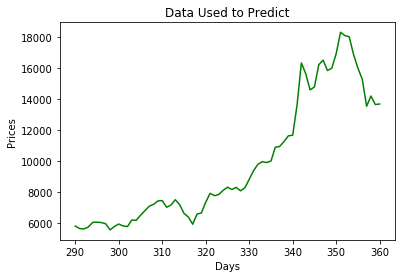

In [246]:
plt.plot(testPredictPlot,color='green')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Data Used to Predict')
plt.show()

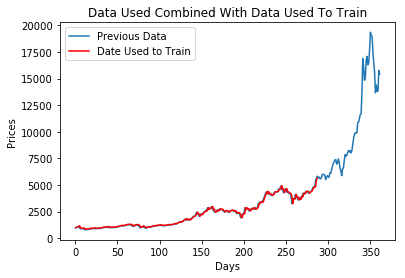

In [247]:
plt.plot(scaler.inverse_transform(bitcoin),label='Previous Data')
plt.plot(trainPredictPlot, color='red',label='Date Used to Train')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Data Used Combined With Data Used To Train')
plt.legend()
plt.show()

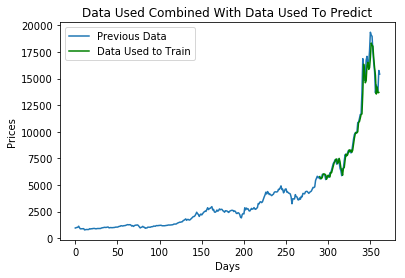

In [248]:
plt.plot(scaler.inverse_transform(bitcoin),label='Previous Data')
plt.plot(testPredictPlot,color='green',label='Data Used to Train')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Data Used Combined With Data Used To Predict')
plt.legend()
plt.show()

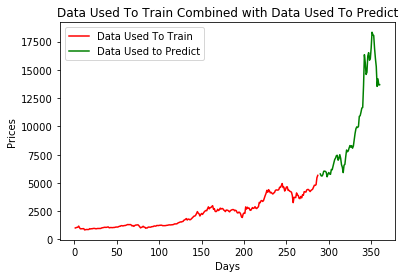

In [249]:
plt.plot(trainPredictPlot, color='red',label='Data Used To Train')
plt.plot(testPredictPlot,color='green',label='Data Used to Predict')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Data Used To Train Combined with Data Used To Predict')
plt.legend()
plt.show()

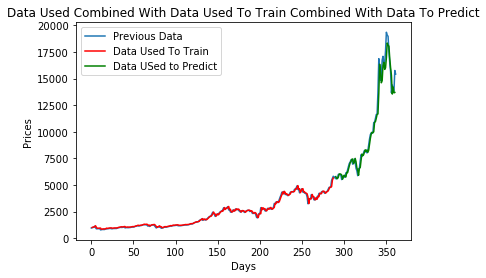

In [250]:
plt.plot(scaler.inverse_transform(bitcoin),label='Previous Data')
plt.plot(trainPredictPlot, color='red',label='Data Used To Train')
plt.plot(testPredictPlot,color='green',label='Data USed to Predict')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Data Used Combined With Data Used To Train Combined With Data To Predict')
plt.legend()
plt.show()

In [19]:
#Value for the Last 5 Days 
print("Price for the Last 5 Days were: \n")
print (testPredict[-5:])

Price for the Last 5 Days were: 

[[0.05527568]
 [0.05213967]
 [0.0513319 ]
 [0.05020038]
 [0.04816943]]


In [21]:
print("Bitcoin price for tomorrow: ", futurePredict)

('Bitcoin price for tomorrow: ', array([[0.04896911]], dtype=float32))
